# 数据分析工具pandas
- 基于Numpy的专用于数据分析的工具库
- 提供很多数据模型和函数，便于数据的读取和分析
- 必学的两个数据结构类: Series和DataFrame

导包
- numpy
- pandas
    - 包含很多的读取数据的函数
- pandas.Series
    - 类似于一维的数组，但包含index索引和数据values
- pandas.DataFrame
    - 类似于二维数组，跟数据库表类似，包含行索引,列标签label和数据
    - 每一列就是一个Series

In [29]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [4]:
a = np.random.randint(0, 255, size=(4,3))
a

array([[158, 116,  40],
       [ 98, 174,  35],
       [231, 235, 139],
       [106, 108,  13]])

In [6]:
a[::-1]  # 将行反转过来

array([[106, 108,  13],
       [231, 235, 139],
       [ 98, 174,  35],
       [158, 116,  40]])

In [7]:
a[:,::-1] # 将列反转过来

array([[ 40, 116, 158],
       [ 35, 174,  98],
       [139, 235, 231],
       [ 13, 108, 106]])

In [8]:
a[::-1,::-1]  # 将行和列全部反转过来

array([[ 13, 108, 106],
       [139, 235, 231],
       [ 35, 174,  98],
       [ 40, 116, 158]])

In [18]:
# plt读取图片并显示图片
gyy = plt.imread('gyy6.jpg')  # shape是三维的
display(gyy.size,gyy.shape)

4343808

(1414, 1024, 3)

In [19]:
%matplotlib inline  # 当前内部显示matplotlib绘制的图表

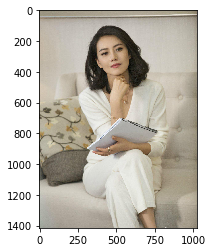

In [21]:
plt.imshow(gyy)

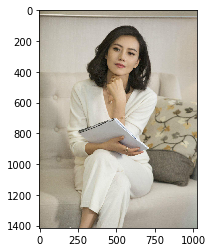

In [24]:
gyy_1 = gyy[:,::-1]  # 按列反转
plt.imshow(gyy_1)

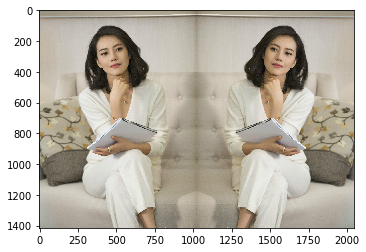

In [25]:
gyy_2 = np.concatenate((gyy, gyy_1), axis=1) # 列拼接图片
plt.imshow(gyy_2)

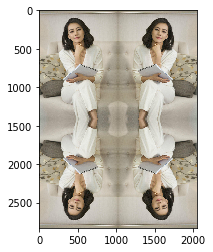

In [27]:
gyy_3 = gyy_2[::-1]
gyy_4 = np.concatenate((gyy_2, gyy_3)) #  行拼接图片
plt.imshow(gyy_4)

In [28]:
plt.imsave('gyy6_large.jpg',gyy_4)

# Series的创建

- 以列表、ndarray的方式创建

【注】列表或ndarray必须是一维

In [30]:
s1 = Series([177, 165, 155, 190, 186])  # 描述5位同学的身高
s1

0    177
1    165
2    155
3    190
4    186
dtype: int64

In [32]:
# 描述5位同学的身高
indices = ('赵小东', '王大丽', '陈姜', '王小东', '刘备')
s2 = Series(data=[177, 165, 155, 190, 186],
            index=indices,
            name='height(cm)')  
s2

赵小东    177
王大丽    165
陈姜     155
王小东    190
刘备     186
Name: height(cm), dtype: int64

In [35]:
# Series对象中的核心属性
print(s2.name, s2.values, s2.index)
print(type(s2.values))  # numpy.ndarray
print(type(s2.index))  # pandas.core.indexes.base.Index
print(s2.name)  # 列名

height(cm) [177 165 155 190 186] Index(['赵小东', '王大丽', '陈姜', '王小东', '刘备'], dtype='object')
<class 'numpy.ndarray'>
<class 'pandas.core.indexes.base.Index'>
height(cm)


In [39]:
# 随机生成100位同学的数学成绩(0, 150)
s2 = Series(np.random.randint(0, 150, size=100),
            name='数学')
s2

0      67
1      17
2     140
3      49
4      80
5      80
6      17
7     110
8      19
9     128
10     68
11     91
12     88
13     79
14     58
15     37
16      3
17     86
18     39
19    101
20     94
21     81
22     38
23     48
24     40
25     37
26     20
27     15
28     38
29     41
     ... 
70     58
71     19
72     26
73      3
74     15
75     26
76    115
77     65
78    104
79     37
80    119
81    134
82      6
83    133
84    132
85    119
86    137
87     68
88      2
89     15
90     30
91     64
92    149
93     38
94    126
95    143
96      2
97    144
98     87
99     27
Name: 数学, Length: 100, dtype: int64

- 以字典的方式创建Series

【注意】此次字典的key是有序的

In [41]:
# 创建5个VIP会员， {'VIP账号': 金额}
vips = Series({
    'QF1001':10,
    'QF1002':30,
    'QF1003':11.5,
    'QF1004':18.5,
    'QF1005':21.15
}, name='money(w)')
vips

QF1001    10.00
QF1002    30.00
QF1003    11.50
QF1004    18.50
QF1005    21.15
Name: money(w), dtype: float64

# Series的操作

## 索引操作
- 显示索引  , 使用是索引名， .loc[]
- 隐式索引， 使用索引值, .iloc[]

In [42]:
gyy = Series({'数学': 133,
              '语文': 150,
              '英语': 145,
              '理综': 300}, name='高圆圆')
gyy

数学    133
理综    300
英语    145
语文    150
Name: 高圆圆, dtype: int64

In [43]:
gyy['数学']  # 显示索引

133

In [44]:
gyy[['数学', '语文']]  # 显示索引， 查看是多个索引，返回Series

数学    133
语文    150
Name: 高圆圆, dtype: int64

In [46]:
gyy['数学':'英语']  # 显示索引的切片操作， 包含结束位置的索引 

数学    133
理综    300
英语    145
Name: 高圆圆, dtype: int64

In [49]:
# 【建议】.loc[]方式
gyy.loc[['理综', '数学']]

理综    300
数学    133
Name: 高圆圆, dtype: int64

In [50]:
gyy.loc['数学':'理综']

数学    133
理综    300
Name: 高圆圆, dtype: int64

In [51]:
gyy.index

Index(['数学', '理综', '英语', '语文'], dtype='object')

In [52]:
gyy.iloc[:3]  # 隐式索引， 显示前3门课程成绩, 索引值从0开始

数学    133
理综    300
英语    145
Name: 高圆圆, dtype: int64

In [55]:
gyy.iloc[[0, -1]]  # 最后一个位置：gyy.index.size-1  或 -1

数学    133
语文    150
Name: 高圆圆, dtype: int64

In [56]:
gyy[0]  # 隐式索引 

133

## Series的概念
- head(n) 查看Series前n条的数据
- tail(m) 查看Series后n条的数据

In [59]:
s2 = Series(np.random.randint(0, 100, size=50),name='英语')
s2.head(2)  #  默认查看前5条

0    34
1    47
Name: 英语, dtype: int64

In [61]:
s2.tail(2)  # 默认查看最后5条

48    45
49    88
Name: 英语, dtype: int64

## NaN值

索引没有相应数值时，显示NaN(Not a Number)

In [63]:
s2[0] = None
s2[4] = np.NAN # np.NAN, np.nan, np.NaN
s2.head()

0     NaN
1    47.0
2    96.0
3    35.0
4     NaN
Name: 英语, dtype: float64

## 检验NaN值
- pd.isnull(), pd.notnull() 获取Series中的为NaN或非NaN的数据
- s.isnull(),  s.notnull()   通过Sereis的对象来检验
- isnull()和notnull()返回是某个索引值的bool值,True或False

【注意】isnull()和notnull()返回的结果，可以作为索引使用

In [66]:
top10 = s2.head(10)
top10[top10.isnull()]  # 获取元素为NaN的数据

0   NaN
4   NaN
Name: 英语, dtype: float64

In [68]:
top10[top10.notnull()] # 读取非nan的数据

1    47.0
2    96.0
3    35.0
5    26.0
6    49.0
7    66.0
8    49.0
9     8.0
Name: 英语, dtype: float64

In [70]:
s2[pd.isnull(s2)]  # 使用pd.isnull(obj) 从obj中获取为空的索引元素

0   NaN
4   NaN
Name: 英语, dtype: float64

## 更多的Series属性
- name 数据集的名称， 一般表示某一特征(身高，体重，价格)
- values 数据集， 是ndarray类型
- index 数据集的索引， 默认为0-(n-1)数值(隐式)，可以指定索引名称(显示)
- shape 数据集的维度，但是Series只能是一维的
- size 数据集的长度

In [73]:
s2.name

'英语'

# Series的运算

ndarray的运算都可以用于Series
- 如果出现Nan运算，结果则为Nan, 除了使用Series的函数来运算。
- 两个Series进行运算时，自动补全索引，索引值为Nan

In [75]:
s2.head()+40

0      NaN
1     87.0
2    136.0
3     75.0
4      NaN
Name: 英语, dtype: float64

In [77]:
s2.head() / 10

0    NaN
1    4.7
2    9.6
3    3.5
4    NaN
Name: 英语, dtype: float64

In [79]:
top5 = s2.head()  # 前5个
top10 = s2.head(10)  # 前10个
display(top5, top10)
top5+ top10

0     NaN
1    47.0
2    96.0
3    35.0
4     NaN
Name: 英语, dtype: float64

0     NaN
1    47.0
2    96.0
3    35.0
4     NaN
5    26.0
6    49.0
7    66.0
8    49.0
9     8.0
Name: 英语, dtype: float64

0      NaN
1     94.0
2    192.0
3     70.0
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
Name: 英语, dtype: float64

## 使用Series提供的函数来进行运算
- 可以通过fill_value属性，填充Nan的替换值
- add()  加法
- sub()  减法
- div()  除法
- mul()  乘法

In [83]:
top5.add(5, fill_value=0)  # 计算前，将nan值替换成0

0      5.0
1     52.0
2    101.0
3     40.0
4      5.0
Name: 英语, dtype: float64

In [86]:
# top10.fillna(0) 将Series中存在nan值的元素替换成指定的value
# top5.dropna() 将Series中存在nan值索引删除
top5.add(top10.fillna(0), fill_value=0)

0      0.0
1     94.0
2    192.0
3     70.0
4      0.0
5     26.0
6     49.0
7     66.0
8     49.0
9      8.0
Name: 英语, dtype: float64

In [93]:
b5 = s2.tail()
b5

45    73.0
46    64.0
47    36.0
48    45.0
49    88.0
Name: 英语, dtype: float64

In [102]:
b5.reset_index().iloc[:,-1]

0    73.0
1    64.0
2    36.0
3    45.0
4    88.0
Name: 英语, dtype: float64